In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### 1. Import Dataset


In [2]:
df = pd.read_csv('ObesityDataSet.csv', encoding='latin-1')

### 2 Exploration Dataset

In [3]:
# Preview of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


##### Indice de masse corporelle= Weight/(Height*Height)


    • Insuffisance pondérale inférieure à 18,5

    • Normal 18,5 à 24,9

    • Surpoids 25,0 à 29,9

    • Obésité I 30,0 à 34,9

    • Obésité II 35,0 à 39,9

    • Obésité III supérieure à 40

In [5]:
# Add IMC column
df['IMC'] = df['Weight']/(df['Height']*df['Height'])

In [6]:
# Shape of the dataset 
df.shape

(2111, 18)

In [7]:
# Columns of the dataset 
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'IMC'],
      dtype='object')

In [8]:
# Types of the features
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
IMC                               float64
dtype: object

In [9]:
# Number of NA per columns
df.isna().sum().sort_values(ascending=True)

Gender                            0
MTRANS                            0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
SMOKE                             0
CAEC                              0
NCP                               0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
Age                               0
NObeyesdad                        0
IMC                               0
dtype: int64

#####  We can see that we don't have NA values

Our dataset is therefore already cleaned up because neither column of the two datasets contains undetermined values.

In [10]:
temp=dict(zip(df["Gender"].unique(),["1","2"]))
df["Gender"].replace(temp,inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,2,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,2,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,2,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


#### Replace qualitative features by numerical values

In [11]:
temp=dict(zip(df["family_history_with_overweight"].unique(),["0","1"]))
df["family_history_with_overweight"].replace(temp,inplace=True)

In [12]:
temp=dict(zip(df["FAVC"].unique(),["0","1"]))
df["FAVC"].replace(temp,inplace=True)

In [13]:
temp=dict(zip(df["CAEC"].unique(),["0","1","2","3"]))
df["CAEC"].replace(temp,inplace=True)

In [14]:
temp=dict(zip(df["SMOKE"].unique(),["0","1"]))
df["SMOKE"].replace(temp,inplace=True)

In [15]:
temp=dict(zip(df["SCC"].unique(),["0","1"]))
df["SCC"].replace(temp,inplace=True)

In [16]:
temp=dict(zip(df["CALC"].unique(),["0","1","2","3"]))
df["CALC"].replace(temp,inplace=True)

In [17]:
temp=dict(zip(df["MTRANS"].unique(),["0","1","2","3","4"]))
df["MTRANS"].replace(temp,inplace=True)

### 3. Data Visualization 

In [63]:
df_copy=df.copy()
target = 'NObeyesdad'
features_list = list(df_copy.columns)
features_list.remove(target)

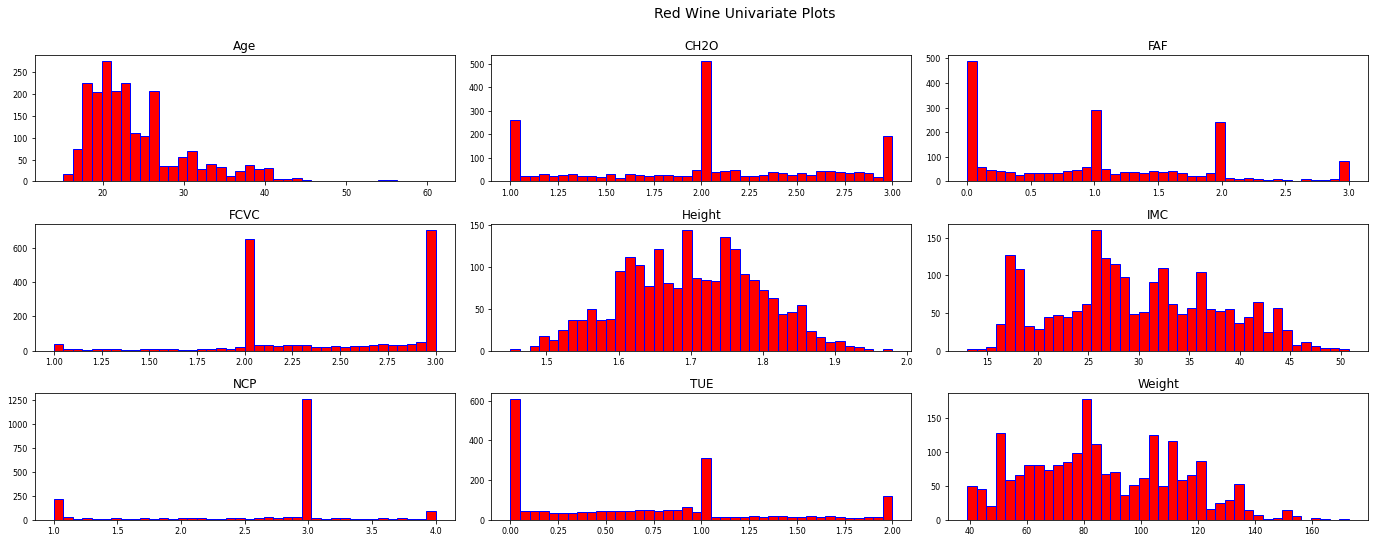

In [64]:
df_copy[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('NObeyesdad Univariate Plots', x=0.65, y=1.25, fontsize=14);

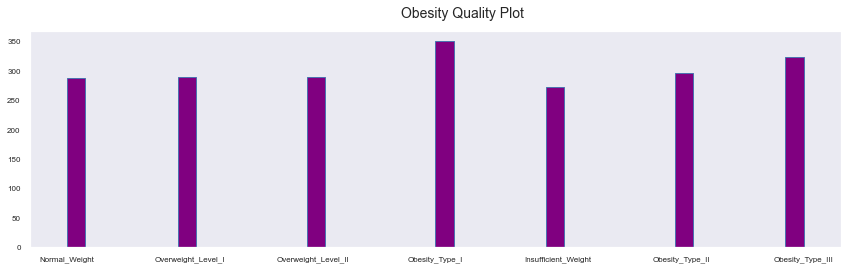

In [110]:
df_copy[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(10,3), color='purple')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Obesity Quality Plot', x=0.65, y=1.25, fontsize=14);

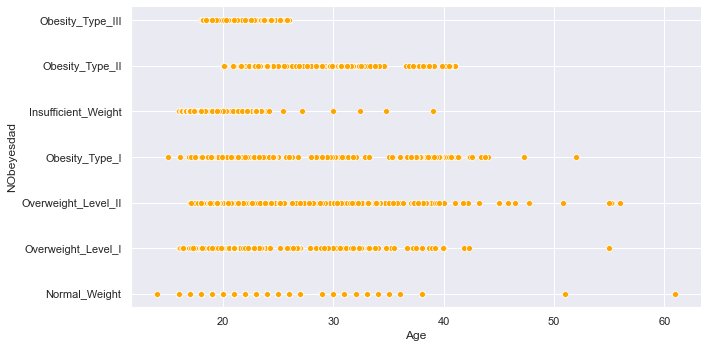

In [90]:
sns.set()
sns.relplot(data=df_copy, x='Age', y=target, kind='scatter', height=5, aspect=2, color='orange');

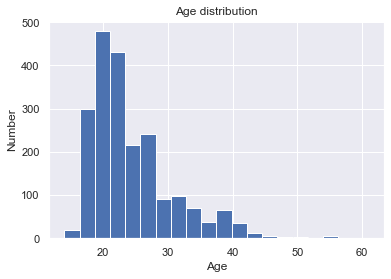

In [93]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins = 20) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number')
plt.color='orange'
plt.show()

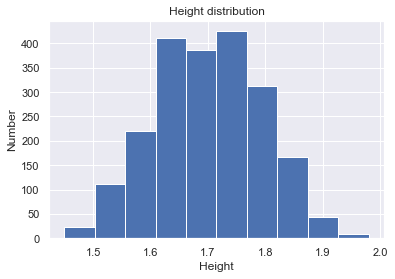

In [94]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Height'],bins = 10) 
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Number')
plt.show()

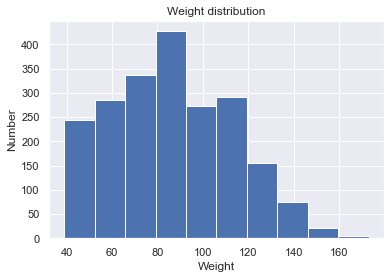

In [95]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Weight'],bins = 10) 
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.show()

Text(0.5, 1.0, 'Count obesity')

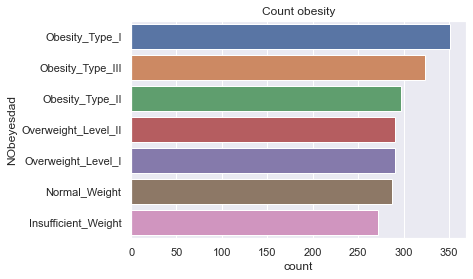

In [100]:
sns.countplot(y="NObeyesdad", data=df, order = df['NObeyesdad'].value_counts().index).set_title("Count obesity")

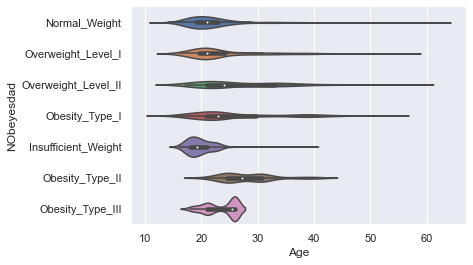

In [97]:
sns.violinplot(df['Age'], df['NObeyesdad']) #Variable Plot
sns.despine()


count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


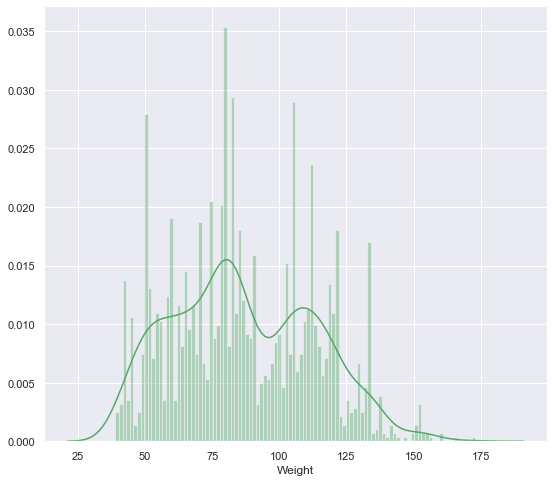

In [101]:
print(df['Weight'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Weight'], color='g', bins=100, hist_kws={'alpha': 0.4});

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

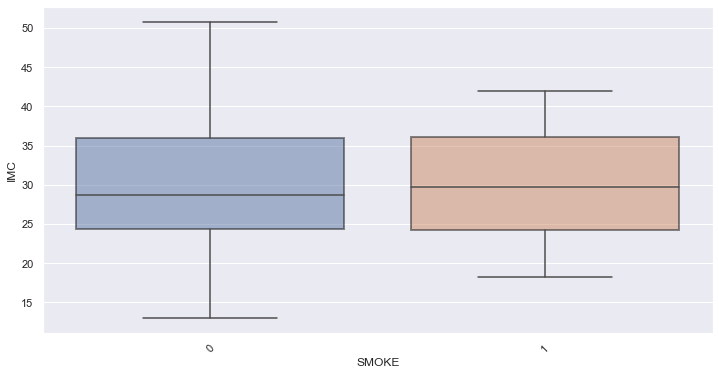

In [102]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SMOKE', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

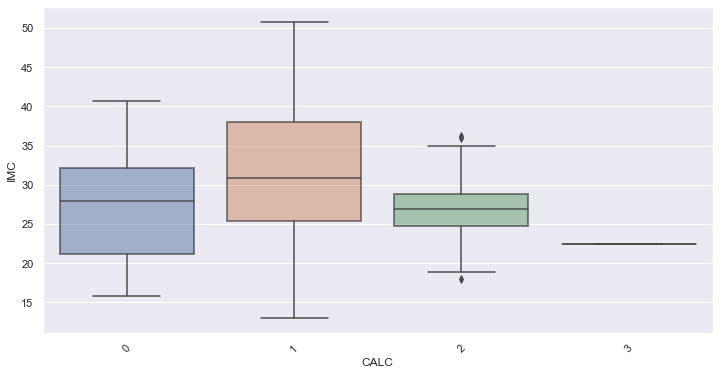

In [103]:
#Alcool
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='CALC', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

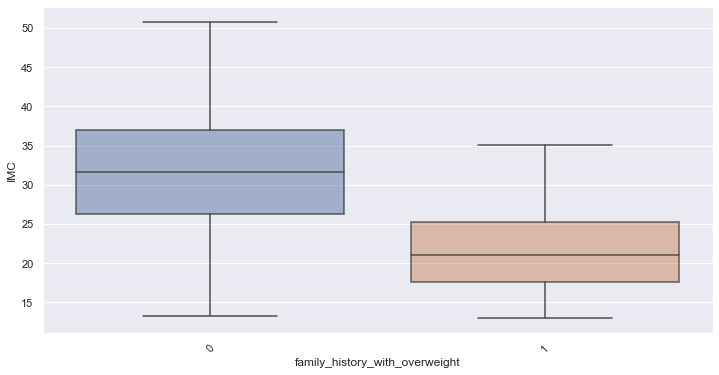

In [104]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='family_history_with_overweight', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

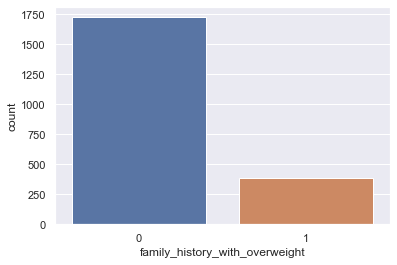

In [105]:
sns.countplot(df["family_history_with_overweight"])

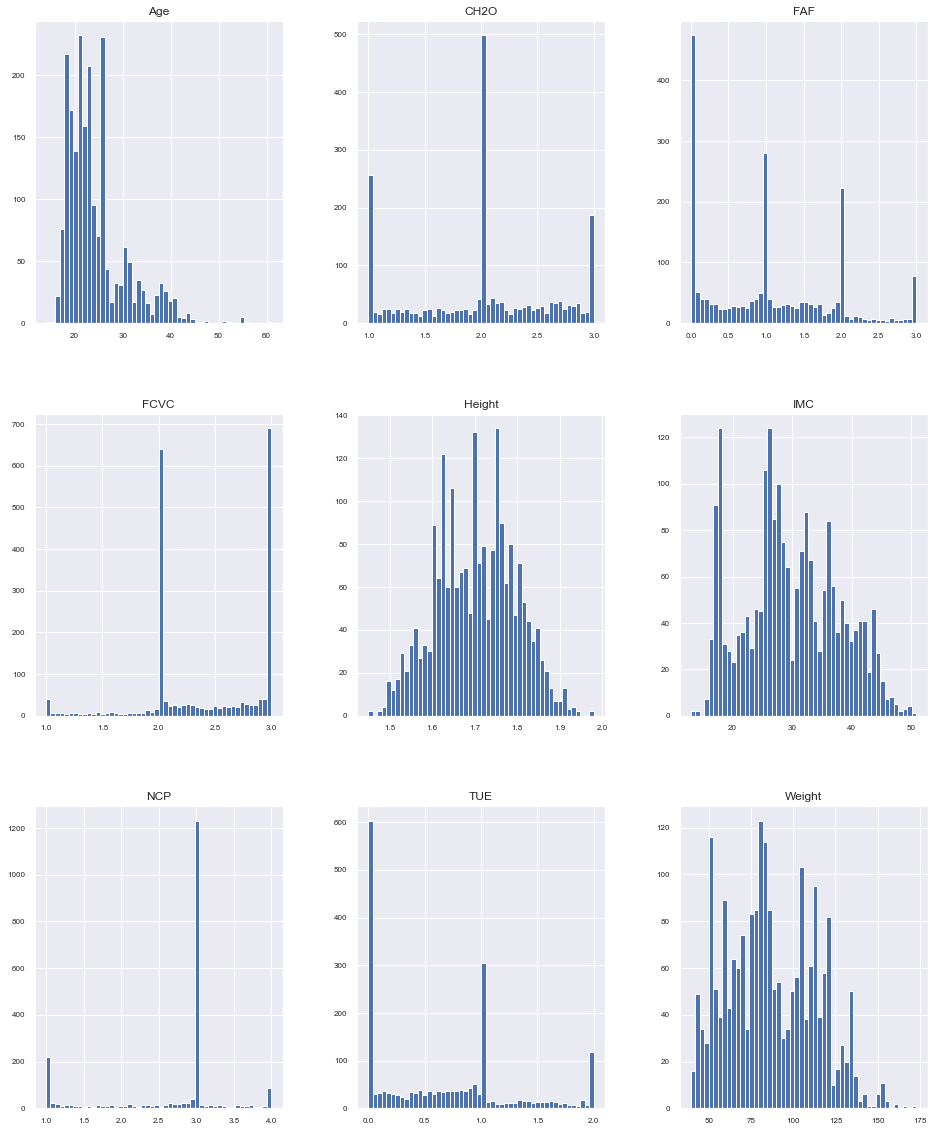

In [106]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

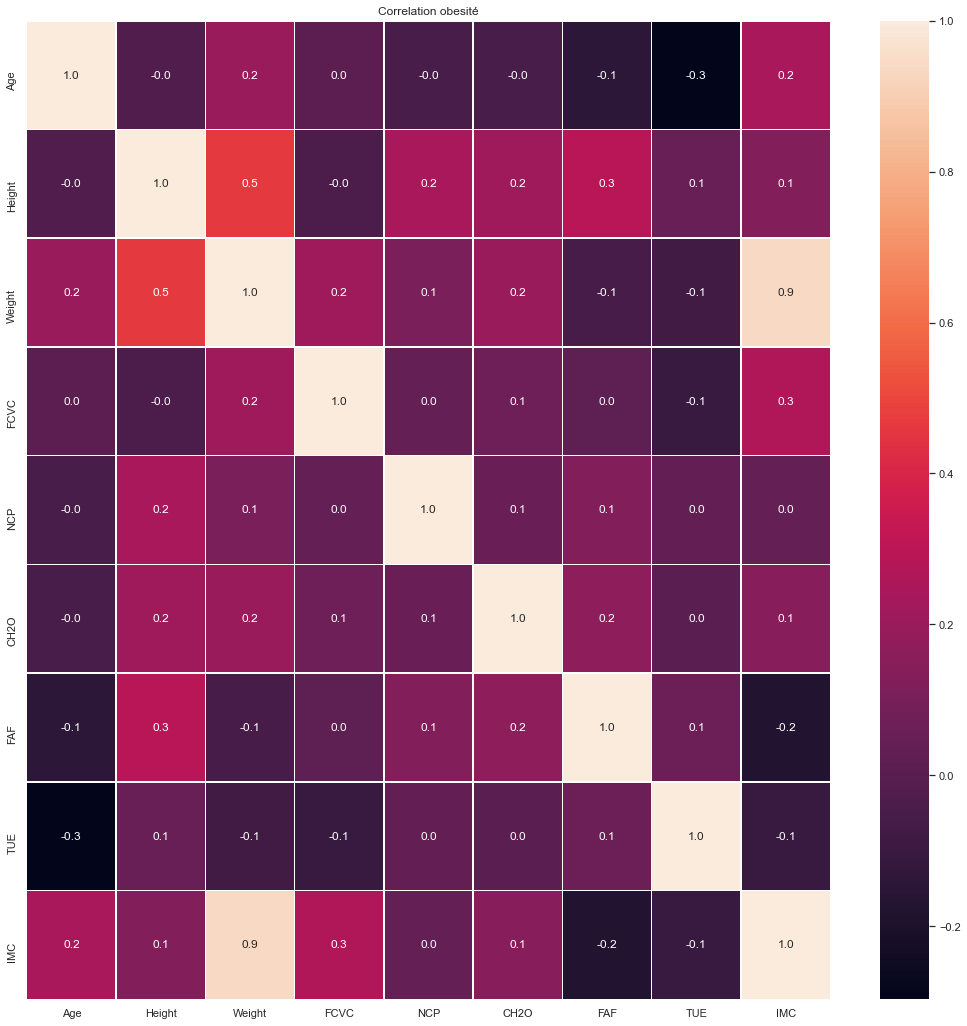

In [107]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax).set(title="Correlation obesité")
plt.show()

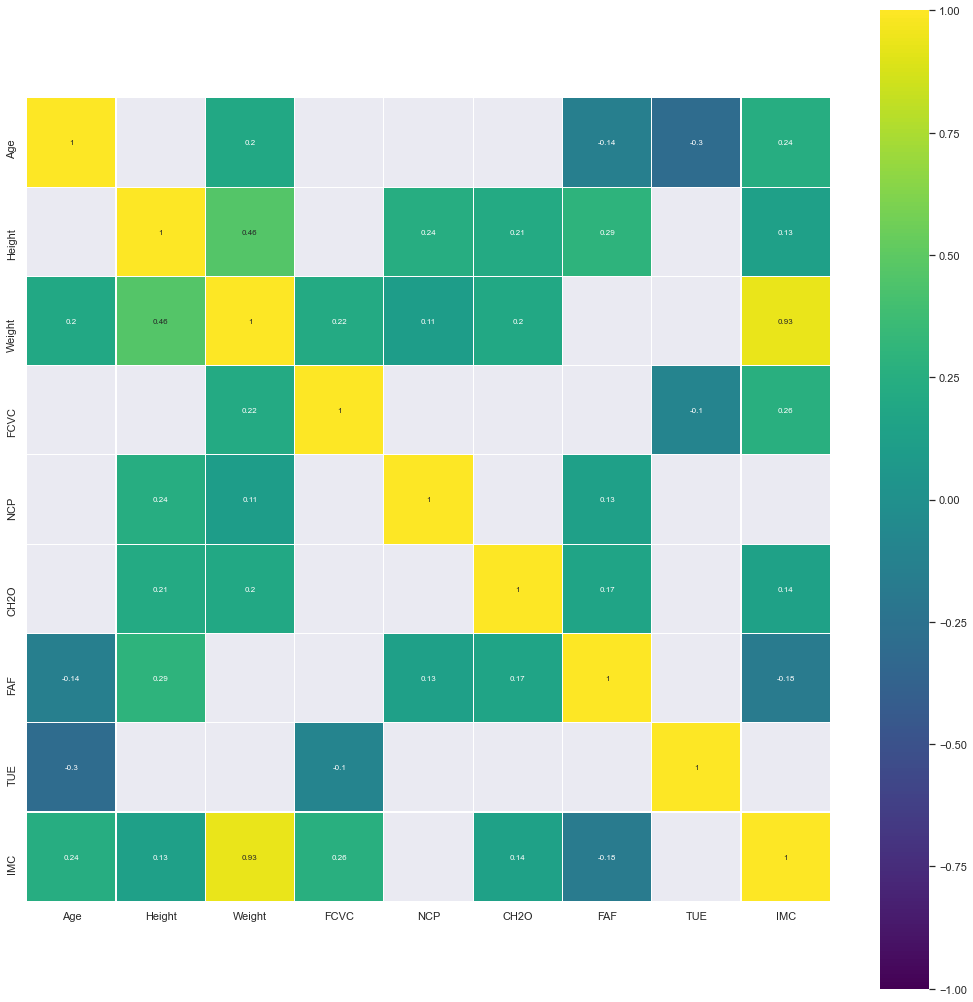

In [108]:
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, ax=ax,annot_kws={"size": 8}, square=True);

### 4.Preprocessing Data

In [31]:
# J'suis pas sur de ce que je fais bg hésite pas à modifier
from sklearn.model_selection import train_test_split
#X = df.drop('NObeyesdad', axis=1).copy()
#Y = df.NObeyesdad.copy()
#NObeyesdad

In [32]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=10)

### 5. Machine Learning Models

#### Supervised

In [33]:
# Ici tente des trucs si tu le sens faut faire des modèles, en créant un training et test data 
# et choper la meilleure précisision un peu comme au hackaton 

from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [34]:
list_models_name = []
list_models = []
list_precision = {'all' : [], 'selected' : []}
list_accuracy = {'all' : [], 'selected' : []}

#### KNN

In [38]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df.loc[:,df.columns != 'NObeyesdad'], df.loc[:,'NObeyesdad']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9463722397476341


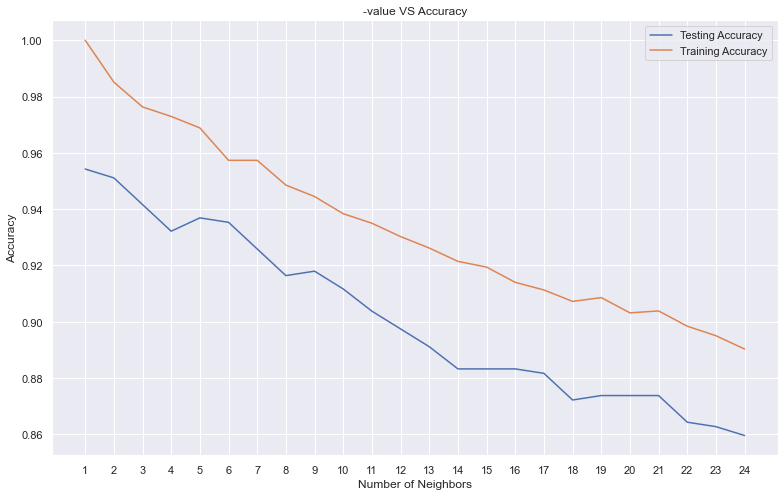

Best accuracy is 0.9542586750788643 with K = 1


In [109]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [45]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [-0.017563   -0.01845976 -0.00383     0.00203768  0.00279598]
CV scores average:  -0.007003818546804363


In [46]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = df.loc[:,df.columns != 'NObeyesdad'], df.loc[:,'NObeyesdad']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[ 91   1   0   0   0   0   0]
 [  2  75   0   0   0   0   0]
 [  0   0 112   2   0   0   0]
 [  0   0   0  85   0   0   0]
 [  0   0   0   0  92   0   0]
 [  0   1   0   0   0  85   3]
 [  0   0   0   0   0   0  85]]
Classification report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.99      0.98        92
      Normal_Weight       0.97      0.97      0.97        77
     Obesity_Type_I       1.00      0.98      0.99       114
    Obesity_Type_II       0.98      1.00      0.99        85
   Obesity_Type_III       1.00      1.00      1.00        92
 Overweight_Level_I       1.00      0.96      0.98        89
Overweight_Level_II       0.97      1.00      0.98        85

           accuracy                           0.99       634
          macro avg       0.99      0.99      0.99       634
       weighted avg       0.99      0.99      0.99       634



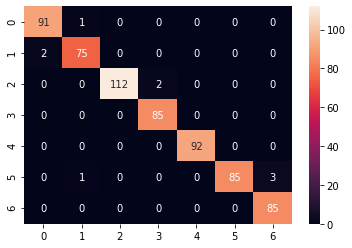

In [47]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(max_iter= 2000, random_state=10)
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


/Users/clement/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85  1  0  0  0  0  0]
 [ 8 66  0  0  0 16  3]
 [ 0  0 78 10  7  0  7]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  6  1  0  0 69 12]
 [ 0  0  6  1  0  9 63]]


### ROC ?

### K-Means

In [122]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)

kmeans.fit(df.drop('NObeyesdad',axis=1))

kmeans.cluster_centers_

def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0


In [124]:
df['Cluster'] = df['NObeyesdad'].apply(converter)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[1287  824]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      2111
           1       0.00      0.00      0.00         0

    accuracy                           0.61      2111
   macro avg       0.50      0.30      0.38      2111
weighted avg       1.00      0.61      0.76      2111



/Users/clement/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Inertia

### PCA

### Random Forest

### 6. Exportation of our model
